## Group 1: merge and biolink format all tsv files
1. with predicate biolink:physically_interacts_with and biolink:gene_associated_with_condition

2. the corresponding config.json file is: config_bigGIM_interacts_with_associated_with

3. all of them have same cols "subject, predicate, object, agent_type, knowledge_level, knowledge_source, object_category, publications, subject_category"

4. Full list of tsv files handled in this group is:
    - Biogrid.edges
    - Drug_target_with_primary_source.edges
    - FA_mut.edges
    - H-I-05.edges
    - HI-II-14.edges
    - HuRI.edges
    - Yang-16.edges
    

In [1]:
## Load necessary packages
import os
import pandas as pd
import glob
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

## Define the version number
version_number = "03_04_2025"

## Load files and concatenate them into one merge tsv file

In [2]:
## Notice!! Please change the file path of following codes into your own
group1_file_path = '/Users/Weiqi0/ISB_working/Ilya_lab/Translator/BigGIM_plover_deployment/files/BigGIM_DrugResponse/graphs/all_exclude_expressions/'

## Define the output path for node & edge files after formatting
download_path_node_file = f'/Users/Weiqi0/ISB_working/Ilya_lab/Translator/BigGIM_plover_deployment/files/BigGIM_DrugResponse/biolink_compliant/BigGIM.interacts_with_associated_with.nodes.biolink.compliant.{version_number}.tsv'
download_path_edge_file = f'/Users/Weiqi0/ISB_working/Ilya_lab/Translator/BigGIM_plover_deployment/files/BigGIM_DrugResponse/biolink_compliant/BigGIM.interacts_with_associated_with.edges.biolink.compliant.{version_number}.tsv'

In [3]:
print("The formatted node file will be saved in this path: ", download_path_node_file)
print("The formatted edge file will be saved in this path: ", download_path_edge_file)

The formatted node file will be saved in this path:  /Users/Weiqi0/ISB_working/Ilya_lab/Translator/BigGIM_plover_deployment/files/BigGIM_DrugResponse/biolink_compliant/BigGIM.interacts_with_associated_with.nodes.biolink.compliant.03_04_2025.tsv
The formatted edge file will be saved in this path:  /Users/Weiqi0/ISB_working/Ilya_lab/Translator/BigGIM_plover_deployment/files/BigGIM_DrugResponse/biolink_compliant/BigGIM.interacts_with_associated_with.edges.biolink.compliant.03_04_2025.tsv


In [4]:
## Check all node files being read
## Read all BigGIM node csv file in group 1

for f in os.listdir(group1_file_path):
    if f.endswith('.nodes.tsv'):
        print(f)

HuRI.nodes.tsv
FA_mut.nodes.tsv
HI-II-14.nodes.tsv
Input_DrugResponse_expr_auc_gdsc_08312022.nodes.tsv
Biogrid.nodes.tsv
H-I-05.nodes.tsv
Drug_target_with_primary_source.nodes.tsv
GDSC_cancer_specific_signatures.nodes.tsv
Input_DrugResponse_mut_IC50_gdsc_08312022.nodes.tsv
TCGA_driver_mut_freq.nodes.tsv
Yang-16.nodes.tsv
cellmarker.nodes.tsv


## Load node & edge files directly

In [5]:
## Read all tsv files for nodes
all_files = glob.glob(os.path.join(group1_file_path, "*.nodes.tsv"))     # advisable to use os.path.join as this makes concatenation OS independent
df_from_each_file = (pd.read_csv(f, sep='\t') for f in all_files)

node_df = pd.concat(df_from_each_file, ignore_index=True)

node_df.head(5)

,id,name,category
0,NCBIGene:10,NAT2,Gene
1,NCBIGene:100008586,GAGE12F,Gene
2,NCBIGene:10002,NR2E3,Gene
3,NCBIGene:10003,NAALAD2,Gene
4,NCBIGene:10005,ACOT8,Gene


In [6]:
## Read all tsv files from edges

all_files = glob.glob(os.path.join(group1_file_path, "*.edges.tsv"))     # advisable to use os.path.join as this makes concatenation OS independent
df_from_each_file = (pd.read_csv(f, sep='\t') for f in all_files)

edge_df = pd.concat(df_from_each_file, ignore_index=True)

edge_df.head(5)

,subject,predicate,object,agent_type,knowledge_level,anatomical_context_qualifier,knowledge_source,object_category,publications,subject_category,frequency_qualifier,has_count,subject_aspect_qualifier,supporting_study_cohort,Data_set,P_value,context_qualifier,statistics_method,supporting_study_size,object_aspect_qualifier
0,NCBIGene:10461,biolink:expressed_in,CL:0000235,manual_agent,knowledge_assertion,UBERON_0000916,CellMarker,Cell,PMID:31982413,Gene,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NCBIGene:2215,biolink:expressed_in,CL:0000235,manual_agent,knowledge_assertion,UBERON_0000916,CellMarker,Cell,PMID:31982413,Gene,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NCBIGene:4360,biolink:expressed_in,CL:0000235,manual_agent,knowledge_assertion,UBERON_0000916,CellMarker,Cell,PMID:31982413,Gene,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NCBIGene:11326,biolink:expressed_in,CL:0000235,manual_agent,knowledge_assertion,UBERON_0000916,CellMarker,Cell,PMID:31982413,Gene,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NCBIGene:9332,biolink:expressed_in,CL:0000235,manual_agent,knowledge_assertion,UBERON_0000916,CellMarker,Cell,PMID:31982413,Gene,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Issues #1
### Plover needs the file to be biolink compliant, so category should always be things like biolink:XXX
### here instead of "Gene", it should be "biolink:gene"

In [7]:
node_df['category'] = 'biolink:' + node_df['category'].astype(str)
node_df.head(5)

,id,name,category
0,NCBIGene:10,NAT2,biolink:Gene
1,NCBIGene:100008586,GAGE12F,biolink:Gene
2,NCBIGene:10002,NR2E3,biolink:Gene
3,NCBIGene:10003,NAALAD2,biolink:Gene
4,NCBIGene:10005,ACOT8,biolink:Gene


In [8]:
edge_df['object_category'] = 'biolink:' + edge_df['object_category'].astype(str)
edge_df.head(5)

,subject,predicate,object,agent_type,knowledge_level,anatomical_context_qualifier,knowledge_source,object_category,publications,subject_category,frequency_qualifier,has_count,subject_aspect_qualifier,supporting_study_cohort,Data_set,P_value,context_qualifier,statistics_method,supporting_study_size,object_aspect_qualifier
0,NCBIGene:10461,biolink:expressed_in,CL:0000235,manual_agent,knowledge_assertion,UBERON_0000916,CellMarker,biolink:Cell,PMID:31982413,Gene,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NCBIGene:2215,biolink:expressed_in,CL:0000235,manual_agent,knowledge_assertion,UBERON_0000916,CellMarker,biolink:Cell,PMID:31982413,Gene,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NCBIGene:4360,biolink:expressed_in,CL:0000235,manual_agent,knowledge_assertion,UBERON_0000916,CellMarker,biolink:Cell,PMID:31982413,Gene,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NCBIGene:11326,biolink:expressed_in,CL:0000235,manual_agent,knowledge_assertion,UBERON_0000916,CellMarker,biolink:Cell,PMID:31982413,Gene,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NCBIGene:9332,biolink:expressed_in,CL:0000235,manual_agent,knowledge_assertion,UBERON_0000916,CellMarker,biolink:Cell,PMID:31982413,Gene,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
edge_df['subject_category'] = 'biolink:' + edge_df['subject_category'].astype(str)
edge_df.head(5)

,subject,predicate,object,agent_type,knowledge_level,anatomical_context_qualifier,knowledge_source,object_category,publications,subject_category,frequency_qualifier,has_count,subject_aspect_qualifier,supporting_study_cohort,Data_set,P_value,context_qualifier,statistics_method,supporting_study_size,object_aspect_qualifier
0,NCBIGene:10461,biolink:expressed_in,CL:0000235,manual_agent,knowledge_assertion,UBERON_0000916,CellMarker,biolink:Cell,PMID:31982413,biolink:Gene,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NCBIGene:2215,biolink:expressed_in,CL:0000235,manual_agent,knowledge_assertion,UBERON_0000916,CellMarker,biolink:Cell,PMID:31982413,biolink:Gene,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NCBIGene:4360,biolink:expressed_in,CL:0000235,manual_agent,knowledge_assertion,UBERON_0000916,CellMarker,biolink:Cell,PMID:31982413,biolink:Gene,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NCBIGene:11326,biolink:expressed_in,CL:0000235,manual_agent,knowledge_assertion,UBERON_0000916,CellMarker,biolink:Cell,PMID:31982413,biolink:Gene,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NCBIGene:9332,biolink:expressed_in,CL:0000235,manual_agent,knowledge_assertion,UBERON_0000916,CellMarker,biolink:Cell,PMID:31982413,biolink:Gene,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
## drop duplicates
node_df = node_df.drop_duplicates()

## Download the result df
# node_df.to_csv(download_path_node_file, sep ='\t', index=False)

## Issue #2

* Plover needs an id column in the edge file
* Design:
* 1: Based on Gwenlyn's suggestion, create a uuid based on combo of subject, predicate, object, and an added file date entry
* 2: Based on Guangrong's comment, add context_qualifier column in the generation of uuid column, the default value of context_qualifier can be NA


In [11]:
edge_df['deploy_date'] = "2025-03-01"
edge_df.head(5)

,subject,predicate,object,agent_type,knowledge_level,anatomical_context_qualifier,knowledge_source,object_category,publications,subject_category,...,has_count,subject_aspect_qualifier,supporting_study_cohort,Data_set,P_value,context_qualifier,statistics_method,supporting_study_size,object_aspect_qualifier,deploy_date
0,NCBIGene:10461,biolink:expressed_in,CL:0000235,manual_agent,knowledge_assertion,UBERON_0000916,CellMarker,biolink:Cell,PMID:31982413,biolink:Gene,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-03-01
1,NCBIGene:2215,biolink:expressed_in,CL:0000235,manual_agent,knowledge_assertion,UBERON_0000916,CellMarker,biolink:Cell,PMID:31982413,biolink:Gene,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-03-01
2,NCBIGene:4360,biolink:expressed_in,CL:0000235,manual_agent,knowledge_assertion,UBERON_0000916,CellMarker,biolink:Cell,PMID:31982413,biolink:Gene,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-03-01
3,NCBIGene:11326,biolink:expressed_in,CL:0000235,manual_agent,knowledge_assertion,UBERON_0000916,CellMarker,biolink:Cell,PMID:31982413,biolink:Gene,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-03-01
4,NCBIGene:9332,biolink:expressed_in,CL:0000235,manual_agent,knowledge_assertion,UBERON_0000916,CellMarker,biolink:Cell,PMID:31982413,biolink:Gene,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-03-01


In [12]:
## add the context_qualifier column
# edge_df['context_qualifier'] = None

## Fill in the first non empty context qualifier found
## removed: 'disease_context_qualifier',
edge_df['context_qualifier'] = edge_df[['context_qualifier', 'subject_aspect_qualifier']].bfill(axis=1).iloc[:, 0]
## if all of them are empty then fill na
edge_df['context_qualifier'] = edge_df['context_qualifier'].fillna(np.nan)
edge_df.head(200)

,subject,predicate,object,agent_type,knowledge_level,anatomical_context_qualifier,knowledge_source,object_category,publications,subject_category,...,has_count,subject_aspect_qualifier,supporting_study_cohort,Data_set,P_value,context_qualifier,statistics_method,supporting_study_size,object_aspect_qualifier,deploy_date
0,NCBIGene:10461,biolink:expressed_in,CL:0000235,manual_agent,knowledge_assertion,UBERON_0000916,CellMarker,biolink:Cell,PMID:31982413,biolink:Gene,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-03-01
1,NCBIGene:2215,biolink:expressed_in,CL:0000235,manual_agent,knowledge_assertion,UBERON_0000916,CellMarker,biolink:Cell,PMID:31982413,biolink:Gene,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-03-01
2,NCBIGene:4360,biolink:expressed_in,CL:0000235,manual_agent,knowledge_assertion,UBERON_0000916,CellMarker,biolink:Cell,PMID:31982413,biolink:Gene,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-03-01
3,NCBIGene:11326,biolink:expressed_in,CL:0000235,manual_agent,knowledge_assertion,UBERON_0000916,CellMarker,biolink:Cell,PMID:31982413,biolink:Gene,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-03-01
4,NCBIGene:9332,biolink:expressed_in,CL:0000235,manual_agent,knowledge_assertion,UBERON_0000916,CellMarker,biolink:Cell,PMID:31982413,biolink:Gene,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,NCBIGene:4907,biolink:expressed_in,CL:0000134,manual_agent,knowledge_assertion,UBERON_0001013,CellMarker,biolink:Cell,PMID:24978442,biolink:Gene,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-03-01
196,NCBIGene:2210,biolink:expressed_in,CL:0000134,manual_agent,knowledge_assertion,UBERON_0001013,CellMarker,biolink:Cell,PMID:24978442,biolink:Gene,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-03-01
197,NCBIGene:5175,biolink:expressed_in,CL:0000134,manual_agent,knowledge_assertion,UBERON_0001013,CellMarker,biolink:Cell,PMID:24978442,biolink:Gene,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-03-01
198,NCBIGene:960,biolink:expressed_in,CL:0000134,manual_agent,knowledge_assertion,UBERON_0001013,CellMarker,biolink:Cell,PMID:24978442,biolink:Gene,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-03-01


In [13]:
import uuid
import pandas as pd

## generate uuid from column combination
def generate_uuid_from_columns(df, column_list, namespace=uuid.NAMESPACE_DNS):
    """
    Generates UUIDs based on the values in a specified column of a Pandas DataFrame.

    Args:
        df (pd.DataFrame): The input DataFrame.
        column_list (list): List of all names of columns to use for UUID generation.
        namespace (uuid.UUID): A UUID namespace (default is uuid.NAMESPACE_DNS).

    Returns:
        pd.Series: A Pandas Series containing the generated UUIDs.
    """
    return df[column_list].apply(lambda x: uuid.uuid5(namespace, str(x)).hex)

def generate_uuid(row):
    """
    Generates a UUID based on the combined values of multiple columns.
    """
    combined_string = ''.join(row.astype(str))
    return uuid.uuid5(uuid.NAMESPACE_DNS, combined_string)

In [14]:
### Add resources_id column, checking whether edge is already

column_list = ['subject', 'predicate', 'object', 'context_qualifier', 'deploy_date']
# Apply the function to each row to generate UUIDs
edge_df['id'] = edge_df[column_list].apply(generate_uuid, axis=1)

# edge_df['id'] = generate_uuid_from_columns(edge_df, column_list)
edge_df.head(10)

,subject,predicate,object,agent_type,knowledge_level,anatomical_context_qualifier,knowledge_source,object_category,publications,subject_category,...,subject_aspect_qualifier,supporting_study_cohort,Data_set,P_value,context_qualifier,statistics_method,supporting_study_size,object_aspect_qualifier,deploy_date,id
0,NCBIGene:10461,biolink:expressed_in,CL:0000235,manual_agent,knowledge_assertion,UBERON_0000916,CellMarker,biolink:Cell,PMID:31982413,biolink:Gene,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-03-01,b041e47f-c4f5-5166-b4fe-557207fcb593
1,NCBIGene:2215,biolink:expressed_in,CL:0000235,manual_agent,knowledge_assertion,UBERON_0000916,CellMarker,biolink:Cell,PMID:31982413,biolink:Gene,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-03-01,99f71540-4efa-55bf-87f1-48cdceb65579
2,NCBIGene:4360,biolink:expressed_in,CL:0000235,manual_agent,knowledge_assertion,UBERON_0000916,CellMarker,biolink:Cell,PMID:31982413,biolink:Gene,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-03-01,9683d6f3-ab01-5331-8a8d-0b1dcd291432
3,NCBIGene:11326,biolink:expressed_in,CL:0000235,manual_agent,knowledge_assertion,UBERON_0000916,CellMarker,biolink:Cell,PMID:31982413,biolink:Gene,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-03-01,b035b572-65d6-5602-ad4e-bbe2c36cf9e9
4,NCBIGene:9332,biolink:expressed_in,CL:0000235,manual_agent,knowledge_assertion,UBERON_0000916,CellMarker,biolink:Cell,PMID:31982413,biolink:Gene,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-03-01,20203999-528e-5335-906e-5441d94ee18c
5,NCBIGene:2167,biolink:expressed_in,CL:0000449,manual_agent,knowledge_assertion,NaN,CellMarker,biolink:Cell,PMID:32355218,biolink:Gene,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-03-01,2f169335-1691-5ed0-b8a7-a26fb93164c6
6,NCBIGene:7350,biolink:expressed_in,CL:0000449,manual_agent,knowledge_assertion,NaN,CellMarker,biolink:Cell,PMID:32355218,biolink:Gene,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-03-01,db73b9cf-d65f-5baa-9605-0898c326f51d
7,NCBIGene:930,biolink:expressed_in,CL:0000134,manual_agent,knowledge_assertion,UBERON_0001013,CellMarker,biolink:Cell,NaN,biolink:Gene,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-03-01,f253cbdf-558b-5b86-9d78-3aefcdb80ea7
8,NCBIGene:2210,biolink:expressed_in,CL:0000034,manual_agent,knowledge_assertion,UBERON_0001013,CellMarker,biolink:Cell,NaN,biolink:Gene,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-03-01,aa07de93-965c-589b-8941-295fc18f09d5
9,NCBIGene:2210,biolink:expressed_in,CL:0000115,manual_agent,knowledge_assertion,UBERON_0001013,CellMarker,biolink:Cell,NaN,biolink:Gene,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-03-01,108d10a9-9d7f-51a8-8c85-1ea4e57aeb93


In [15]:
## drop duplicates
edge_df = edge_df.drop_duplicates()

## Download the result df
# edge_df.to_csv(download_path_edge_file, sep ='\t', index=False)

Now starts the statistical analysis for each version of KGs. 
* No. of nodes,
* No. of edges,  
* All possible categories 
* and distribution of degrees

In [16]:
print("The formatted node file will be saved in this path: ", download_path_node_file)
print("The formatted edge file will be saved in this path: ", download_path_edge_file)

The formatted node file will be saved in this path:  /Users/Weiqi0/ISB_working/Ilya_lab/Translator/BigGIM_plover_deployment/files/BigGIM_DrugResponse/biolink_compliant/BigGIM.interacts_with_associated_with.nodes.biolink.compliant.03_04_2025.tsv
The formatted edge file will be saved in this path:  /Users/Weiqi0/ISB_working/Ilya_lab/Translator/BigGIM_plover_deployment/files/BigGIM_DrugResponse/biolink_compliant/BigGIM.interacts_with_associated_with.edges.biolink.compliant.03_04_2025.tsv


In [17]:
# ## Report the total node number
# ## Get all unique values from the pandas node_df's column "name"
# unique_node_values = node_df['name'].unique()

# print("The total node number added for this verion of KG is: ", len(unique_node_values))

In [18]:
# ## Report the total edge number
# ## Get all unique values from the pandas edge_df's column "id"
# unique_edge_values = edge_df['id'].unique()

# print("The total edge number added for this verion of KG is: ", len(unique_edge_values))

In [19]:
## Get all unique values from the pandas edge_df's column "category"
unique_category_values = edge_df['object_category'].unique()
print("All possible object categories are here: " ,unique_category_values)

All possible object categories are here:  ['biolink:Cell' 'biolink:Protein' 'biolink:Disease'
 'biolink:SmallMolecule' 'biolink:Gene']


In [20]:
## Get all unique values from the pandas concatenated_df's column "category"
unique_category_values = edge_df['subject_category'].unique()
print("All possible subject categories are here: " ,unique_category_values)

All possible subject categories are here:  ['biolink:Gene' 'biolink:Protein' 'biolink:Disease'
 'biolink:SmallMolecule']


In [21]:
## Create a graph from the DataFrame
graph = nx.from_pandas_edgelist(edge_df, 'subject', 'object', edge_attr='predicate')

## Print graph information
print('Number of nodes', len(set(graph.nodes)))
print('Number of edges', len(set(graph.edges)))
print('Average degree', sum(dict(graph.degree).values()) / len(graph.nodes))

Number of nodes 24548
Number of edges 829979
Average degree 67.62090598012058


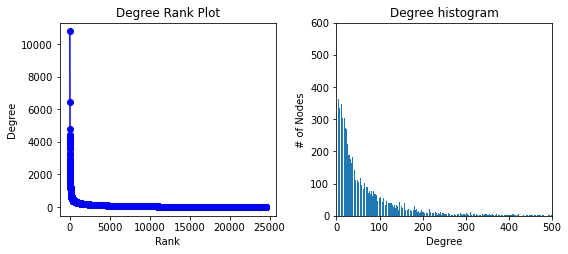

In [22]:
degree_sequence = sorted((d for n, d in graph.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

# ax0 = fig.add_subplot(axgrid[0:3, :])
# Gcc = graph.subgraph(sorted(nx.connected_components(graph), key=len, reverse=True)[0])
# pos = nx.spring_layout(Gcc, seed = 1984)
# nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
# nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
# ax0.set_title("Connected components of this version of KG")
# ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")
ax2.set_xlim([0, 500])
ax2.set_ylim([0, 600])

fig.tight_layout()
plt.show()

### Obtain information on qualifier columns and number of rows in each of them

In [25]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

print(edge_df.columns.tolist())

['subject', 'predicate', 'object', 'agent_type', 'knowledge_level', 'anatomical_context_qualifier', 'knowledge_source', 'object_category', 'publications', 'subject_category', 'frequency_qualifier', 'has_count', 'subject_aspect_qualifier', 'supporting_study_cohort', 'Data_set', 'P_value', 'context_qualifier', 'statistics_method', 'supporting_study_size', 'object_aspect_qualifier', 'deploy_date', 'id']


In [26]:
list_of_qualifer = [x for x in edge_df.columns.tolist() if x.endswith('_qualifier')]

print(list_of_qualifer)

['anatomical_context_qualifier', 'frequency_qualifier', 'subject_aspect_qualifier', 'context_qualifier', 'object_aspect_qualifier']


In [28]:
## Then loop through those columns of a pandas dataframe edge_df in the list list_of_qualifer and find non null row counts

## Create a dictionary to store non-null counts
non_null_counts = {}

## Loop through each column in list_of_qualifier
for col in list_of_qualifer:
    # Count non-null values in the column
    non_null_counts[col] = edge_df[col].notnull().sum()

# Print out the non-null counts
for col, count in non_null_counts.items():
    print(f"Column '{col}' has {count} non-null values.")

Column 'anatomical_context_qualifier' has 34134 non-null values.
Column 'frequency_qualifier' has 901 non-null values.
Column 'subject_aspect_qualifier' has 185550 non-null values.
Column 'context_qualifier' has 185550 non-null values.
Column 'object_aspect_qualifier' has 159039 non-null values.
